In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as sps

## EF5058 HW2
EID 58555905 LAM Chun Ming 

Full Submission found here: https://github.com/Toby3220/EF-5058 , pdf file serves as a **hardcopy backup ONLY** for any discrepency please refer to the ipynb file

In [52]:
# reading in data 
IRdata = pd.read_csv("CarryInterestRate.csv")
IRdata["Date"] = pd.to_datetime(IRdata["Date"])
IRdata.set_index("Date",inplace=True)

# reading in data
ERdata = pd.read_csv("CarryExRate.csv")
ERdata["Date"] = pd.to_datetime(ERdata["Date"])
ERdata.set_index("Date",inplace=True)



### Q1) For each month of the sample, rank the countries based on their interest rate, compute their avreage ranks (1 being the lowest)

In [53]:
# ranking currencies, by their returns 
ranking = IRdata.rank(1,"min")

# average rank by country
ranking.mean(0).sort_values()

# SZ = Switzerland, JP = Japan, GR = Germany, SW = Sweden, CA = Canada, AU = Australia, NZ = New Zealand  

SZ    1.762
JP    2.052
GR    3.602
US    4.878
SW    5.322
CA    5.642
UK    6.456
AU    7.428
NZ    7.820
dtype: float64

Switzerland and Japan holds the lowest and second lowest rank respectively being most oftern "funding currencies" ; whilst New Zealand & Australia holds the highest and second higest rank respeectively, being most oftern "investment currencies" 

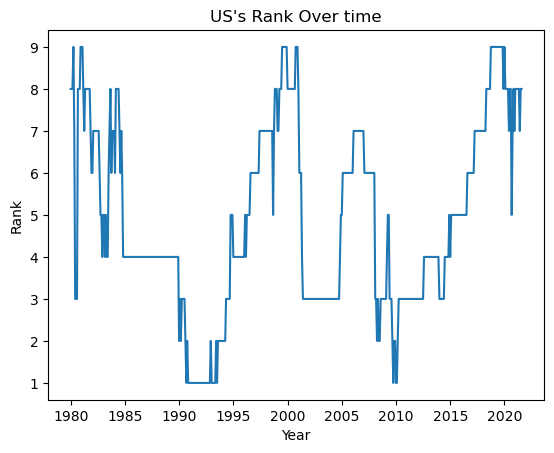

In [73]:
# ploting the evlution of US rank overtime 
plt.plot(ranking.index, ranking['US'])

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5))

plt.xlabel("Year")
plt.ylabel("Rank")
plt.title("US's Rank Over time")
plt.show()



#### 2) Create Long & Short Positions based by shorting the lowest 3 countries, and longing the highest 3 countries with the annualised interest rate returns at the time

In [55]:
# creating Long Short positions, shorting the bottum 3, longing the top 3
position = pd.DataFrame(0,IRdata.index,IRdata.columns)
position[ranking<=3]=-1
position[ranking>=7]=1

# average position  
position.mean(0).sort_values()


SZ   -0.930
JP   -0.870
GR   -0.506
US   -0.026
SW    0.084
CA    0.222
UK    0.486
AU    0.736
NZ    0.800
dtype: float64

We see that canada have a weak average long position 

### Q3) Compute the excess returns of the portfolio

Here we use the actually realised excess returns for the month (relative to the us risk free rate). we shift the returns backwards, as at row i, the exces return data shows the realised returns from i-1 to i (now i to i+1), whilst the on row i the portfolio positions data shows the positions to be held from i to i+1. By shifting, we account for the timing having both being from i to i+1 

Text(0.5, 1.0, 'Portfolio Value Overtime')

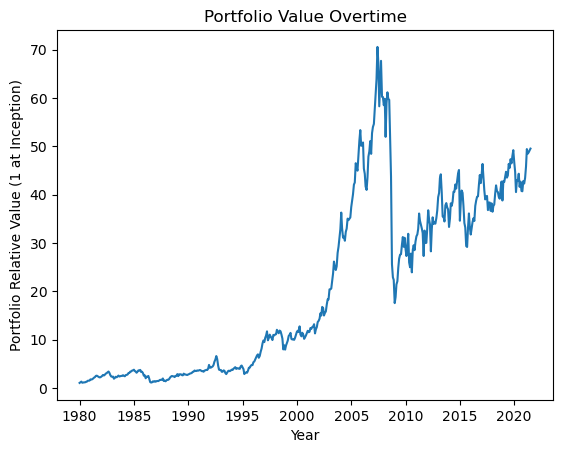

In [75]:

# calcualting the portfolio returns, we shift Excess Returns backwards to account for timing

ret = position*(ERdata.shift(-1))
ret.dropna(inplace=True)

# summing together excess returns to find portfolio excess returns
portret = ret.sum(1)

# visualising portfolio value
plt.plot((portret+1).cumprod())
plt.xlabel("Year")
plt.ylabel("Portfolio Relative Value (1 at Inception)")
plt.title("Portfolio Value Overtime")


In [78]:

# Annualised Results
results = pd.DataFrame( index = ["port (Annual)"],columns = ["Mean", "Std", "Sharpe Ratio"])

results["Mean"] = portret.mean()*12
results["Std"] = portret.std()*(12**0.5)
results["Sharpe Ratio"] = results["Mean"]/results["Std"]
results

,Mean,Std,Sharpe Ratio
port (Annual),0.134266,0.274582,0.488982


Here we see that there is large excess return from this, however the standard deviation is also very large, impacting the Sharp Ratio. This is reflected in our graphed portfolio value above, where very large losses are suffered periodically 

Text(0.5, 1.0, 'Probability Density of Monnthly Stratergy Returns')

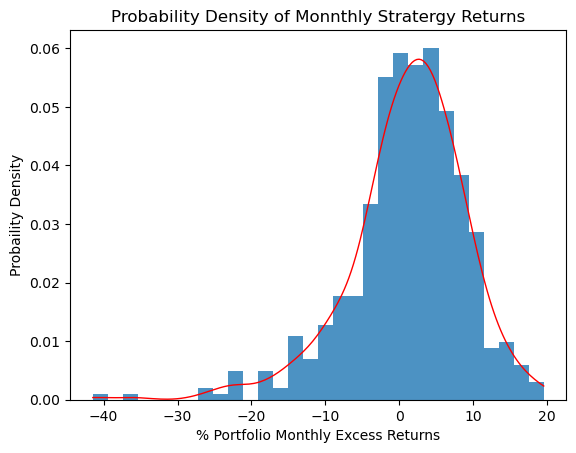

In [81]:
plt.figure(0)
counts, bins, patches = plt.hist(portret*100,bins= 30, density=True, alpha = 0.8)

kde  = sps.gaussian_kde(portret*100)
xvasls = np.linspace((portret*100).min(), (portret*100).max(),200)
kdeAns = kde(xvasls)
plt.plot(xvasls,kdeAns,'r-',lw=1)

plt.xlabel("% Portfolio Monthly Excess Returns")
plt.ylabel("Probaility Density")
plt.title("Probability Density of Monnthly Stratergy Returns")


In [70]:
# Monthly Results
mresults = pd.DataFrame( index = ["port (Monthly)"],columns = ["Mean", "Std","Skew",  "Sharpe Ratio"])

mresults["Mean"] = portret.mean()
mresults["Std"] = portret.std()
mresults["Sharpe Ratio"] = mresults["Mean"]/mresults["Std"]
mresults["Skew"] = portret.skew()
mresults


,Mean,Std,Skew,Sharpe Ratio
port (Monthly),0.011189,0.079265,-1.048775,0.141157


Looking at the monthly results, and the retrun histogram, we see that this stratergy have a very large negative skew, where in the extereme it can suffer from negative 30-40% monthly retuns!  